# Hyperparameter optimization with GridSearchCV
The grid search was run from command line, and the scripts used are available in the [GridSearchCV](https://github.com/caiocrocha/COVID-19/tree/master/SARS-CoV-2/postera.ai/GridSearchCV) folder.

## Table of contents
1. [KNN](#knn)    
2. [Decision Tree](#dt)    
3. [Random Forest](#rf)    
4. [XGBoost](#xgb)    

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directory = '../GridSearchCV'

<a id='knn'></a>
## KNN

* n_neighbors = sqrt(N)

In [15]:
grid_knn = pd.read_csv(f'{directory}/KNeighborsClassifier/grid_search.csv')
grid_knn.sort_values('mean_test_score', ascending=False).head()

,clf,mean_test_score,std_test_score,clf__n_neighbors
10,KNeighborsClassifier,0.609006,0.069174,25
4,KNeighborsClassifier,0.608673,0.069596,13
5,KNeighborsClassifier,0.604188,0.077572,15
9,KNeighborsClassifier,0.602533,0.067188,23
7,KNeighborsClassifier,0.602360,0.071278,19


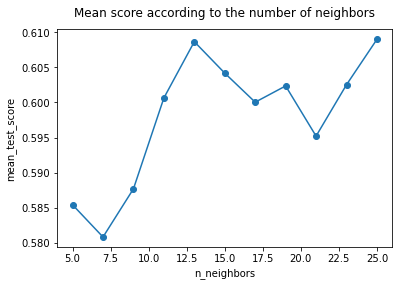

In [4]:
x = grid_knn['clf__n_neighbors']
y = grid_knn['mean_test_score']
plt.plot(x, y, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('mean_test_score')
plt.title('KNeighborsClassifier')
plt.title('Mean score according to the number of neighbors', y=1.03)
plt.show()

We see here that the optimal value of K = 25, or sqrt(N), where N is the number of molecules.

<a id='dt'></a>
## Decision Tree

* max_depth = 6

In [14]:
grid_dt = pd.read_csv(f'{directory}/DecisionTreeClassifier/grid_search.csv')
grid_dt = grid_dt.fillna(value=0)
grid_dt.sort_values('clf__max_depth', inplace=True)
grid_dt.sort_values('mean_test_score', ascending=False).head()

,clf,mean_test_score,std_test_score,clf__max_depth
3,DecisionTreeClassifier,0.602802,0.072384,6.0
4,DecisionTreeClassifier,0.601964,0.067252,7.0
6,DecisionTreeClassifier,0.599978,0.078256,9.0
5,DecisionTreeClassifier,0.594269,0.080975,8.0
2,DecisionTreeClassifier,0.591413,0.065472,5.0


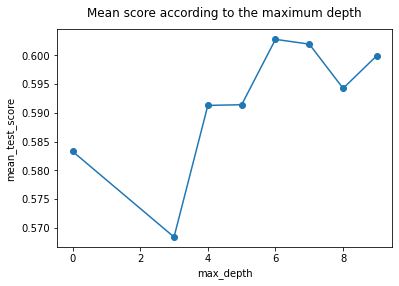

In [7]:
x = grid_dt['clf__max_depth']
y = grid_dt['mean_test_score']
plt.plot(x, y, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mean_test_score')
plt.title('KNeighborsClassifier')
plt.title('Mean score according to the maximum depth', y=1.03)
plt.show()

<a id='rf'></a>
## Random Forest

* max_depth = 9
* n_estimators = 500

In [13]:
grid_rf = pd.read_csv(f'{directory}/RandomForestClassifier/grid_search.csv')
grid_rf.sort_values('mean_test_score', ascending=False).head()

,clf,mean_test_score,std_test_score,clf__max_depth,clf__n_estimators
33,RandomForestClassifier,0.622329,0.081464,9.0,500
31,RandomForestClassifier,0.620623,0.078875,9.0,100
34,RandomForestClassifier,0.620176,0.081097,9.0,1000
32,RandomForestClassifier,0.619717,0.079857,9.0,200
30,RandomForestClassifier,0.615146,0.081230,9.0,50


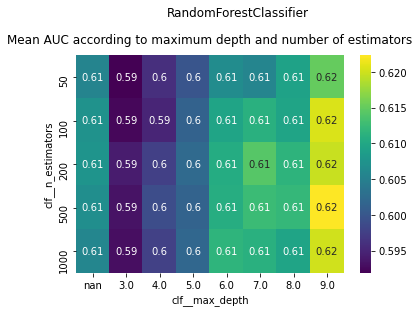

In [9]:
table = grid_rf.pivot('clf__n_estimators', 'clf__max_depth', 'mean_test_score')
sns.heatmap(table, cmap='viridis', annot=True)
plt.suptitle('RandomForestClassifier', y=1.05)
plt.title('Mean AUC according to maximum depth and number of estimators', y=1.03)
plt.show()

<a id='xgb'></a>
## XGBoost

* max_depth = 3
* n_estimators = 50
* eta = 0.2 (learning rate)

In [12]:
grid_xgb = pd.read_csv(f'{directory}/XGBClassifier/grid_search.csv')
grid_xgb.sort_values('mean_test_score', ascending=False).head()

,clf,mean_test_score,std_test_score,clf__eta,clf__max_depth,clf__n_estimators
120,XGBClassifier,0.617259,0.081382,0.20,3.0,50
121,XGBClassifier,0.615749,0.084728,0.20,3.0,100
125,XGBClassifier,0.614903,0.083735,0.20,4.0,50
53,XGBClassifier,0.614642,0.081066,0.01,5.0,500
67,XGBClassifier,0.614547,0.079576,0.01,8.0,200


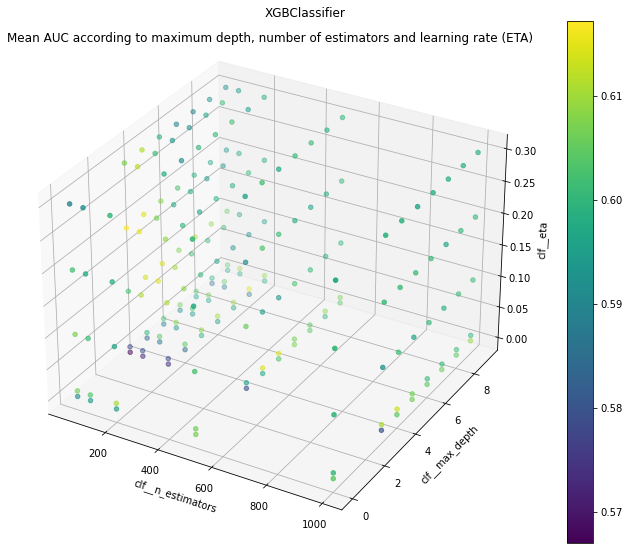

In [11]:
grid_xgb = grid_xgb.fillna(value=0)

x = grid_xgb['clf__n_estimators']
y = grid_xgb['clf__max_depth']
z = grid_xgb['clf__eta']
c = grid_xgb['mean_test_score']

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12.8, 9.6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(x, y, z, c=c, cmap='viridis')
fig.colorbar(p)

ax.set_xlabel('clf__n_estimators')
ax.set_ylabel('clf__max_depth')
ax.set_zlabel('clf__eta')
plt.suptitle('XGBClassifier', y=0.9)
plt.title('Mean AUC according to maximum depth, number of estimators and learning rate (ETA)', y=1.03)
plt.show()